## 광진구 불법 주정차 단속 분석
https://www.data.go.kr/data/15034487/fileData.do

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/서울특별시 광진구_주정차단속현황_20230331.csv', encoding='cp949')
df

,단속일시,과태료,단속지역,단속장소,위반내용,견인지시,단속구분
0,2015-01-01 06:44,32000,화양동,119-4,주정차금지,견인처리,PDA
1,2015-01-01 07:01,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,CCTV
2,2015-01-01 07:24,40000,구의동,동서울터미널 주차장앞,32조내지 34조위반,미견인,CCTV
3,2015-01-01 08:00,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,CCTV
4,2015-01-01 08:15,32000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,CCTV
...,...,...,...,...,...,...,...
503295,2023-03-31 22:47,32000,중곡동,서울 광진구 중곡동 192-30,보도,미견인,스마트앱(서울시)
503296,2023-03-31 22:58,64000,광장동,320-15,특별구역,미견인,안전신문고(행안부)
503297,2023-03-31 23:42,32000,중곡동,서울 광진구 중곡동 669,보도,미견인,PDA
503298,2023-03-31 23:42,32000,중곡동,서울 광진구 중곡동 669,보도,미견인,PDA


In [3]:
# 최근 1년간 데이터 추출
# 2022-03-31 ~ 2023-03-31

year_df = df[df['단속일시'] > '2022-03-31']
len(year_df)

40678

In [4]:
year_df.head()

,단속일시,과태료,단속지역,단속장소,위반내용,견인지시,단속구분
462622,2022-03-31 07:06,32000,구의동,강변역 1번 출구,주정차금지(황색실선)구역,미견인,고정형CCTV
462623,2022-03-31 07:12,32000,광장동,광현교회 앞,주차금지(황색점선)구역,미견인,고정형CCTV
462624,2022-03-31 08:02,32000,구의동,리젠트오피스텔건너편,소화전,미견인,고정형CCTV
462625,2022-03-31 08:32,40000,자양동,서울특별시 광진구 자양로5길 30,도로 모퉁이,미견인,PDA
462626,2022-03-31 08:33,32000,구의동,서울 광진구 구의동 15-1,교통소통장애,견인처리,PDA


In [5]:
# 단속지역, 단속장소 묶음을 리스트로 변환

year_df_list = year_df[['단속지역', '단속장소']].values.tolist()
year_df_list[:5]

[['구의동', '강변역 1번 출구'],
 ['광장동', '광현교회 앞'],
 ['구의동', '리젠트오피스텔건너편'],
 ['자양동', '서울특별시 광진구 자양로5길 30'],
 ['구의동', '서울 광진구 구의동 15-1']]

In [6]:
# 주소 합치기 -> year_df_list의 각 스트링 합치기

merge_year_list = []
for lst in year_df_list:
    merge_year_list.append(' '.join(lst))
    

In [7]:
merge_year_list[:5]

['구의동 강변역 1번 출구',
 '광장동 광현교회 앞',
 '구의동 리젠트오피스텔건너편',
 '자양동 서울특별시 광진구 자양로5길 30',
 '구의동 서울 광진구 구의동 15-1']

### 카카오 주소 좌표 변환 API

In [8]:
# 주소 -> 좌표
def get_location(address):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
    headers = {"Authorization": "KakaoAK bdb0545a26bb34b728441e735f5a4a5f"}
    api_json = json.loads(str(requests.get(url,headers=headers).text))
    documents = api_json.get('documents')
    
    if documents:
        address = documents[0]['address']
        crd = {"lat": str(address['y']), "lng": str(address['x'])}
        address_name = address['address_name']
        return crd
    else:
        return None



In [9]:
# 변환

from tqdm import tqdm
import requests
import json

coordinate = []

for i in tqdm(merge_year_list):
    try:
        crd = get_location(i)
    except TypeError:
        continue
        
    if crd is not None:
        cc = [float(crd['lat']), float(crd['lng'])]
        coordinate.append(cc)

  0%|          | 53/40678 [00:02<30:39, 22.09it/s]


KeyboardInterrupt: 

In [10]:
# 변환된 좌표 csv파일로 추출

import csv

fields = ['latitude', 'longtitude']

with open('coordinate.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    
    writer.writerow(fields)
    writer.writerows(coordinate)

## 시각화

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
coordinate_df = pd.read_csv('coordinate.csv')
coordinate_df

,latitude,longtitude
0,37.531340,127.084038
1,37.553598,127.097362
2,37.547337,127.107685
3,37.548247,127.107219
4,37.546790,127.107277
5,37.567009,127.082139
6,37.538729,127.091174
7,37.541288,127.087837
8,37.530491,127.078722
9,37.535007,127.081845


<AxesSubplot:xlabel='longtitude', ylabel='latitude'>

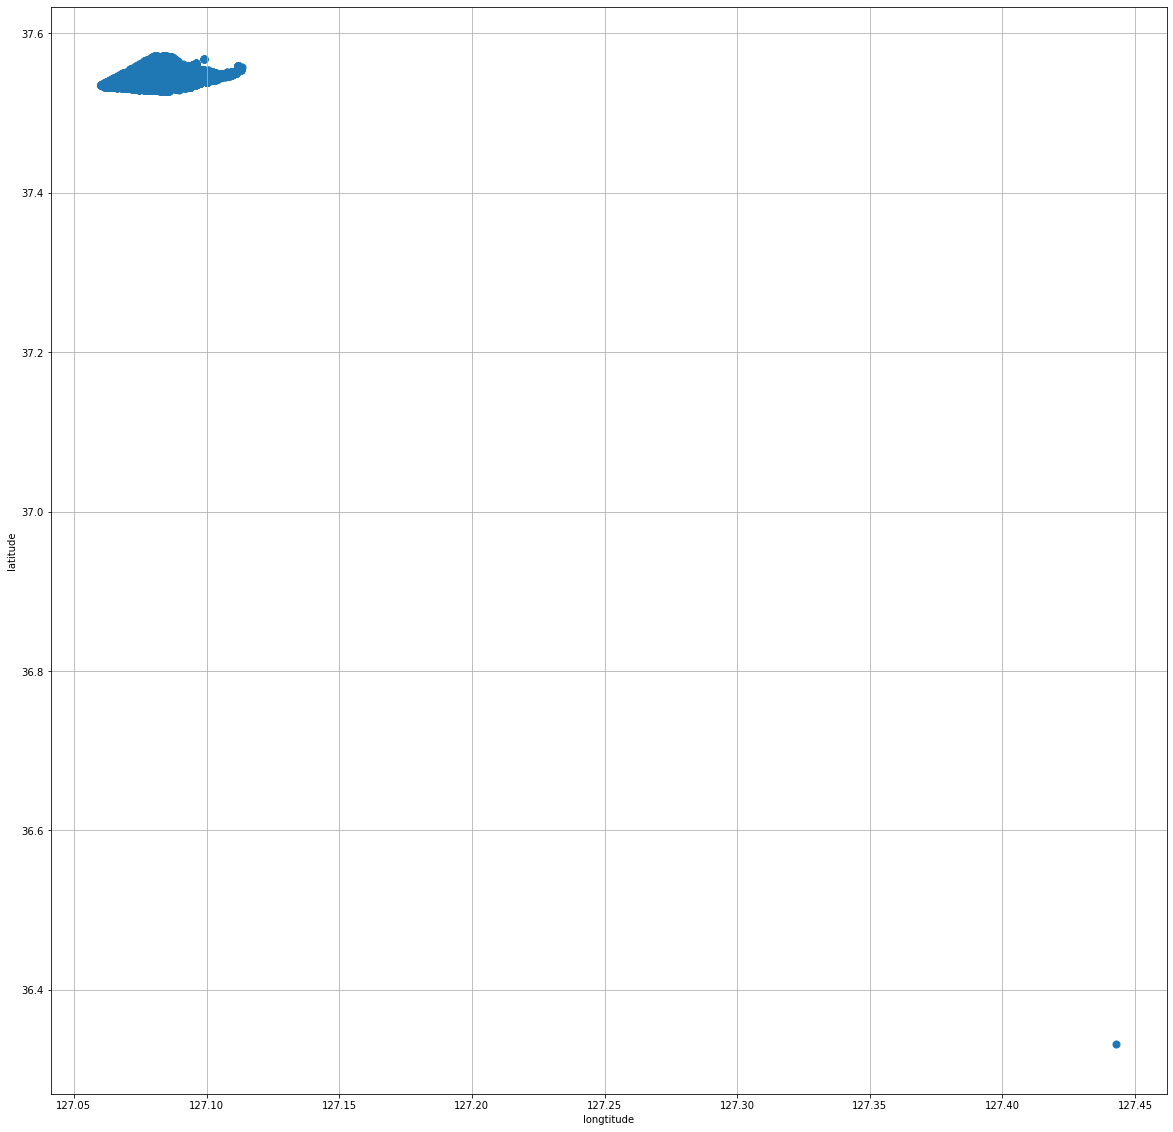

In [31]:
coordinate_df[['longtitude', 'latitude']].plot.scatter(x = 'longtitude', y = 'latitude', figsize = (20, 20), grid = True,s = 50)

In [32]:
# 우측 하단의 이상치 제거
coordinate_df[coordinate_df['latitude']<37.0].index
coordinate_df = coordinate_df.drop(coordinate_df.index[16473])

<AxesSubplot:xlabel='longtitude', ylabel='latitude'>

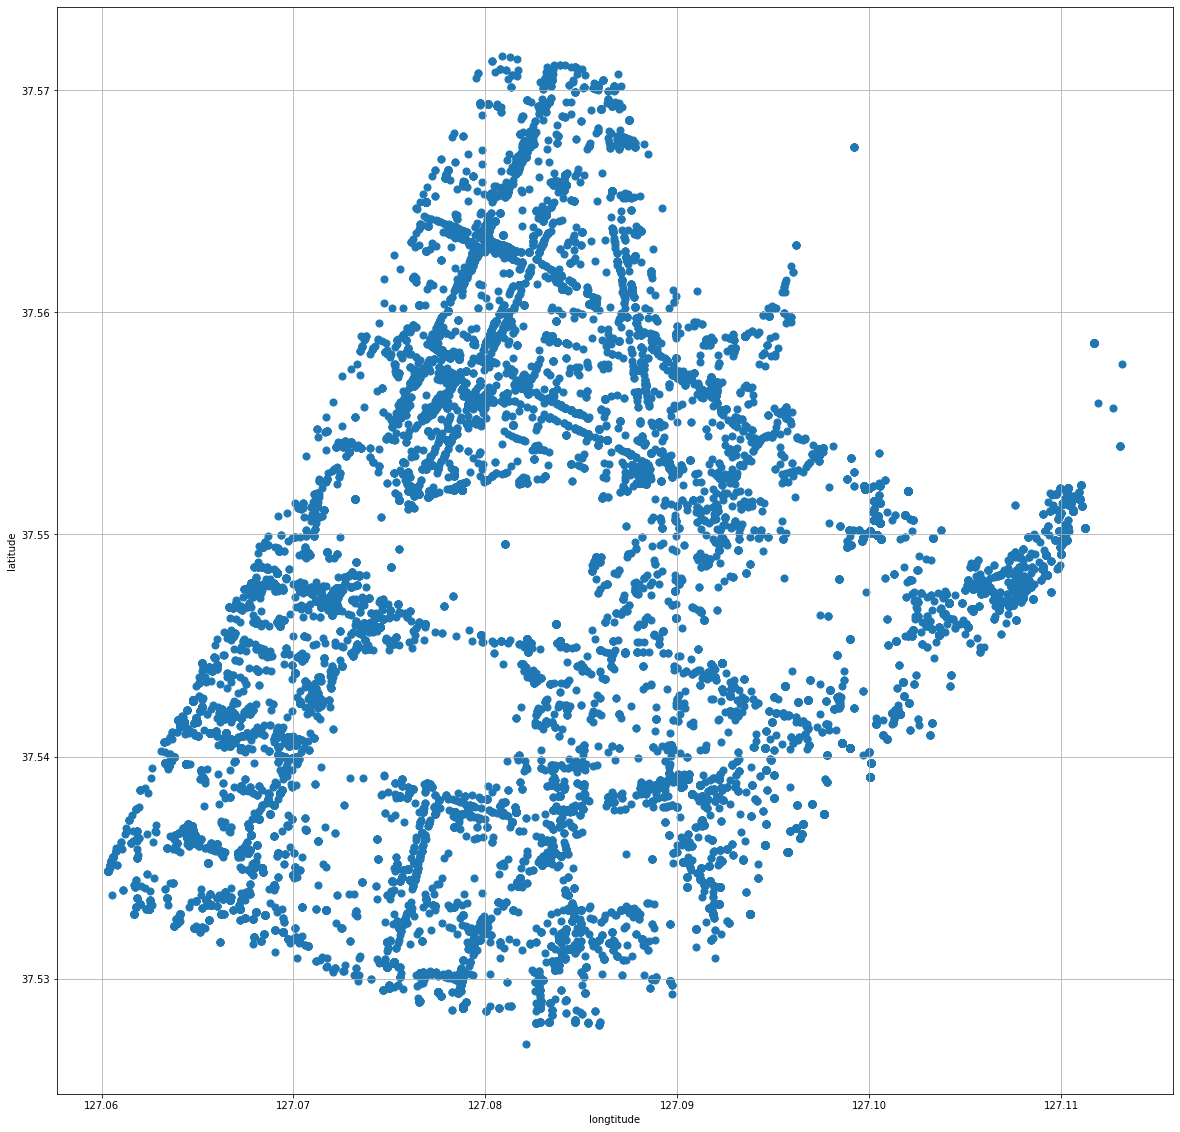

In [33]:

coordinate_df[['longtitude', 'latitude']].plot.scatter(x = 'longtitude', y = 'latitude', figsize = (20, 20), grid = True,s = 50)